In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
import healpy as hp

In [3]:
av = np.load('I_355_tgextmap.npz')
level = 9
av.files

['HPId', 'HPlevel', 'A0', 'e_A0', 'Ntracers']

In [4]:
mask = av['HPlevel'] == level

In [5]:
av['HPId'][mask]

array([  68672,   68673,   68674, ..., 2638246, 2638247, 2638248],
      dtype=int32)

In [6]:
NSIDE = 2**level
NPIX = hp.nside2npix(NSIDE)
print(NPIX)
print(hp.nside2resol(NSIDE, arcmin=True))
m = np.zeros(NPIX)
mn = np.zeros(NPIX)

3145728
6.870972823634812


In [7]:
m[av['HPId'][mask]] = av['A0'][mask]
mn[av['HPId'][mask]] = av['Ntracers'][mask]

In [8]:
m

array([0.    , 0.    , 0.    , ..., 0.1301, 0.2425, 0.    ])

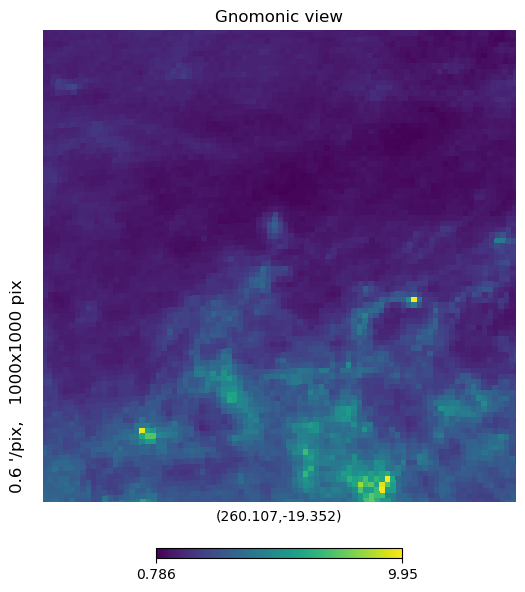

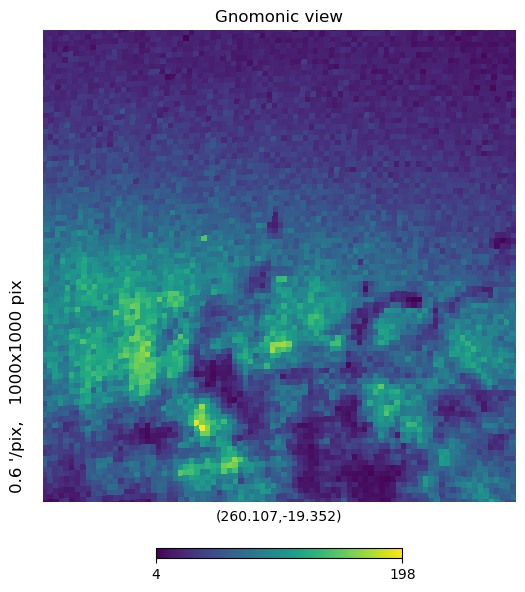

In [12]:
#hp.mollview(m, nest=True, coord=('C', 'G'))
lat = -19.3523078
dl = 5
lon = 260.10740722
#hp.cartview(m, nest=True, lonra=[lon-dl, lon+dl], latra=[lat-dl, lat+dl])
hp.gnomview(m, nest=True, rot=(lon, lat, 45), reso=10*60/1000, xsize=1000)
hp.gnomview(mn, nest=True, rot=(lon, lat, 45), reso=10*60/1000, xsize=1000)
#hp.graticule()

In [10]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import ascii
from astroquery.gaia import Gaia
from astropy.coordinates import Angle
Gaia.ROW_LIMIT = -1

In [ ]:
coord = SkyCoord(ra=lon*u.deg, dec=lat*u.deg, frame='icrs')
width = u.Quantity(1, u.deg)
r = Gaia.query_object_async(coordinate=coord, radius=width*np.sqrt(2))
r

In [ ]:
vec_c = hp.ang2vec(np.radians(lat+90), np.radians(lon))
print(np.radians(lat+90))
disc_ids = hp.query_disc(nside=NSIDE, vec=vec_c, radius=width.to(u.rad).value*np.sqrt(2), nest=True)
pix_rad = (np.sqrt(hp.nside2pixarea(NSIDE)) * u.rad).to(u.deg)
m2 = np.zeros(NPIX)
print(len(disc_ids))

In [ ]:
for ipix in disc_ids:
    pix_angs = hp.pix2ang(NSIDE, ipix, nest=True)
    ra1 = (pix_angs[1] * u.rad).to(u.deg)
    dec1 = ((pix_angs[0] - np.pi/2) * u.rad).to(u.deg)
    print([ra1, dec1])
    mask_loc = (r['ra'] > ra1-pix_rad/2) & (r['ra'] < ra1+pix_rad/2) & (r['dec'] > dec1-pix_rad/2) & (r['dec'] < dec1+pix_rad/2)
    #coord_loc = SkyCoord(ra=ra1, dec=dec1, frame='icrs')
    #r_loc = Gaia.query_object_async(coordinate=coord_loc, width=pix_rad, height=pix_rad)
    m2[ipix] = len(r[mask_loc])
    #m2[disc_ids[ip]] = len(r_loc)

In [ ]:
hp.gnomview(m2, nest=True, rot=(lon, lat, 45), reso=width.to(u.arcmin).value/1000, xsize=1000)